In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from Biquad.Biquad_Daq import Biquad_Daq

from Utils.PlotTools import PlottingTools as pt

import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, HBox
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
daq = Biquad_Daq(0,0,4, 2**10)

Turning on SYNC
Turning off SYNC


In [2]:
daq.setA(1)
daq.setB(0)
daq.setP(0)
daq.setTheta(np.pi)
daq.setM(8)

-9.0
-8.5
-8.0
-7.5
-7.0
-6.5
-6.0
-5.5
-5.0
-4.5
-4.0
-3.5
-3.0
-2.5
-2.0
-1.5
-1.0
-0.5
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0


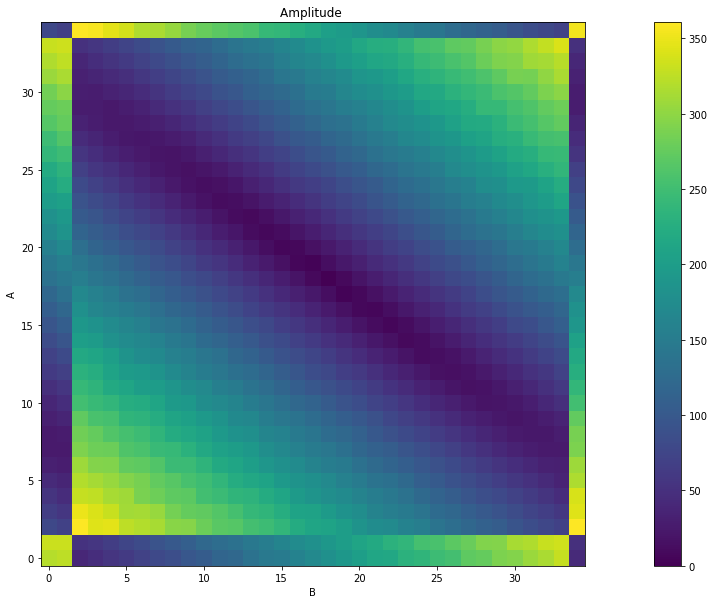

In [3]:
arr = np.linspace(-9,8,35)

result = []
temp = []

for i in arr:
    daq.setA(i)
    print(i)
    for j in arr:
        daq.setB(j)
        daq.set_single_zero_fir()
        daq.JupyterAcquire()
        daq.waveforms[2].setPeaktoPeak()
        daq.waveforms[2].setRMS()
        temp.append(daq.waveforms[2].RMS)
    result.append(temp)
    temp = []
    
plt.figure(figsize=(25, 10))
plt.imshow(result, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show a colorbar
plt.title('Amplitude ')
plt.xlabel('B')
plt.ylabel('A')
plt.gca().invert_yaxis()
plt.show()

In [4]:
# result = []
# temp = []
# start = -7
# end = 7

# # for i in range(-1*start, (-1*end)-1, -1):
# for i in range(start, end+1, 1):
#     daq.setA(i)
#     for j in range(start,end+1):
#         daq.setB(j)
#         daq.set_single_zero_fir()
#         daq.sdv.write(0x00,1)
#         daq.Acquire(2)
#         daq.waveforms[2].setPeaktoPeak()
#         daq.waveforms[2].setRMS()
#         temp.append(daq.waveforms[2].RMS)
#     result.append(temp)
#     temp = []

# plt.figure(figsize=(25, 10))
# plt.imshow(result, cmap='viridis', interpolation='nearest', extent=[start-0.5,end+0.5,end+0.5,start-0.5])
# plt.colorbar()  # Show a colorbar
# plt.title('Amplitude ')
# plt.xlabel('B')
# plt.ylabel('A')
# plt.gca().invert_yaxis()
# plt.show()